# Car Brand Image Recognition with Transfer Learning

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

Using TensorFlow backend.


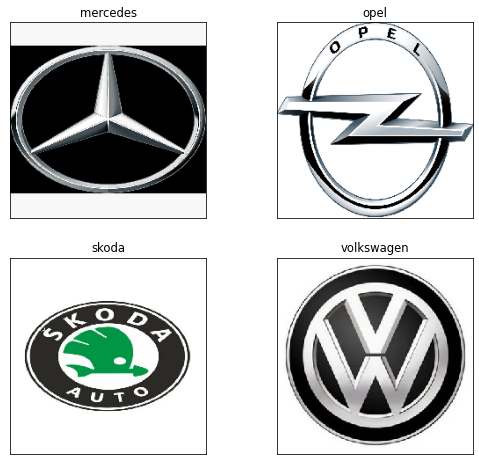

In [2]:
from matplotlib.pyplot import figure

mercedes_logo = load_img('./data/logo/mercedes.jpg', target_size = [224,224])
opel_logo = load_img('./data/logo/opel.jpg', target_size = [224,224])
skoda_logo = load_img('./data/logo/skoda.jpg', target_size = [224,224])
volkswagen_logo = load_img('./data/logo/volkswagen.jpg', target_size = [224,224])


titles = ["mercedes","opel","skoda","volkswagen"]
images = [mercedes_logo,opel_logo,skoda_logo,volkswagen_logo ]

figure(figsize=(9,8), dpi=70)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
# resize all images to this
IMAGE_SIZE = [224, 224]

train_path = './data/Train'
validation_path = './data/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
#don't train existing weights,freeze the existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('data/train/*')

In [7]:
# my layers - I can add more if I want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# define the metrics and optimization method
model.compile( loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [11]:
# data augmentation
train_datagen = ImageDataGenerator( rescale = 1./ 255.,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

validation_datagen = ImageDataGenerator( rescale = 1./255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = IMAGE_SIZE,
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                              target_size = IMAGE_SIZE,
                                                              batch_size =32,
                                                              class_mode = 'categorical')

Found 1287 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [12]:
# fit the model
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = 20,
                              validation_steps = 5,
                              epochs = 20)

c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 60s 3s/step - loss: 6.4966 - accuracy: 0.3203 - val_loss: 5.1379 - val_accuracy: 0.3187
Epoch 2/20
20/20 [==============================] - 56s 3s/step - loss: 2.6796 - accuracy: 0.4516 - val_loss: 2.0224 - val_accuracy: 0.4625
Epoch 3/20
20/20 [==============================] - 56s 3s/step - loss: 1.6408 - accuracy: 0.5301 - val_loss: 1.5905 - val_accuracy: 0.5125
Epoch 4/20
20/20 [==============================] - 56s 3s/step - loss: 1.1458 - accuracy: 0.5922 - val_loss: 1.2134 - val_accuracy: 0.5938
Epoch 5/20
20/20 [==============================] - 57s 3s/step - loss: 0.8557 - accuracy: 0.6703 - val_loss: 1.1179 - val_accuracy: 0.5938
Epoch 6/20
20/20 [==============================] - 55s 3s/step - loss: 0.8765 - accuracy: 0.6894 - val_loss: 1.3395 - val_accuracy: 0.5188
Epoch 7/20
20/20 [==============================] - 57s 3s/step - loss: 0.7647 - accuracy: 0.6938 - val_loss: 1.0349 - val_accuracy: 0.6625
Epoch 8/20
20/20 [==

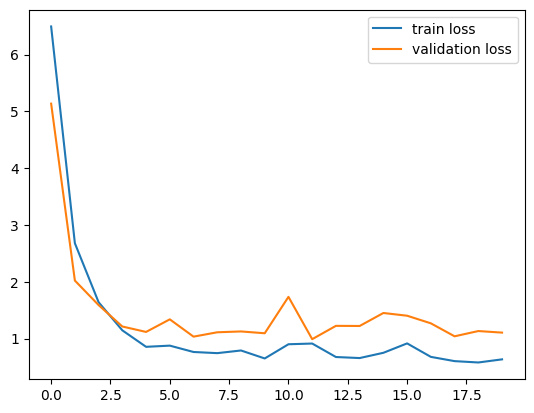

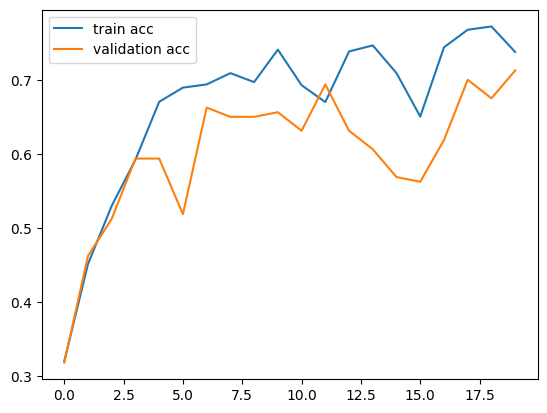

In [14]:
# plot the loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()


#plot the accuracy
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'validation acc')
plt.legend()
plt.show()

In [15]:
# load and use the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from glob import glob

In [16]:
#glob() File wildcards
folders = glob('./data/Train/*')
print(folders)
labels = []

for path in folders:
    l = path.split('/')
    print(l)
    label = l[-1].upper()
    labels.append(label)
labels.sort()
print(labels)

['./data/Train\\mercedes', './data/Train\\opel', './data/Train\\skoda', './data/Train\\volkswagen']
['.', 'data', 'Train\\mercedes']
['.', 'data', 'Train\\opel']
['.', 'data', 'Train\\skoda']
['.', 'data', 'Train\\volkswagen']
['TRAIN\\MERCEDES', 'TRAIN\\OPEL', 'TRAIN\\SKODA', 'TRAIN\\VOLKSWAGEN']


TRAIN\VOLKSWAGEN


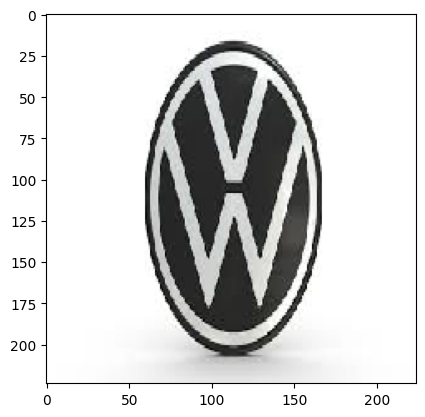

In [17]:
def Predict_Brand(image_path, image_size = [224, 224], labels = labels, model = model):
    img = load_img(image_path, target_size = image_size)
    x = image.img_to_array(img).astype(float)
    x = x / 255.
    x = np.expand_dims(x, axis = 0)
    result = model.predict(x)
    result = np.argmax(result, axis = 1)
    return labels[result[0]]

result = Predict_Brand('./data/Test/volkswagen/images60.jpg')
img = load_img('./data/Test/volkswagen/images60.jpg', target_size = [224,224])
plt.imshow(img)
print(result)

TRAIN\MERCEDES


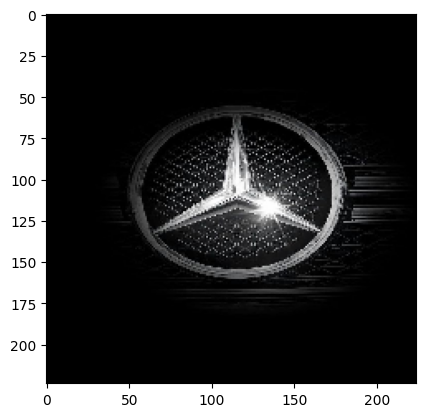

In [18]:
result = Predict_Brand('./data/Test/mercedes/mrc21.jpg')
img = load_img('./data/Test/mercedes/mrc21.jpg', target_size = [224,224])
plt.imshow(img)
print(result)